# 01. Getting Started OCI Vision

Python SDK を用いて、OCI Vision の基本機能を確認するデモです。


### Prepare

In [16]:
%matplotlib inline

import os
from dotenv import load_dotenv
import glob
import base64
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

load_dotenv()


True

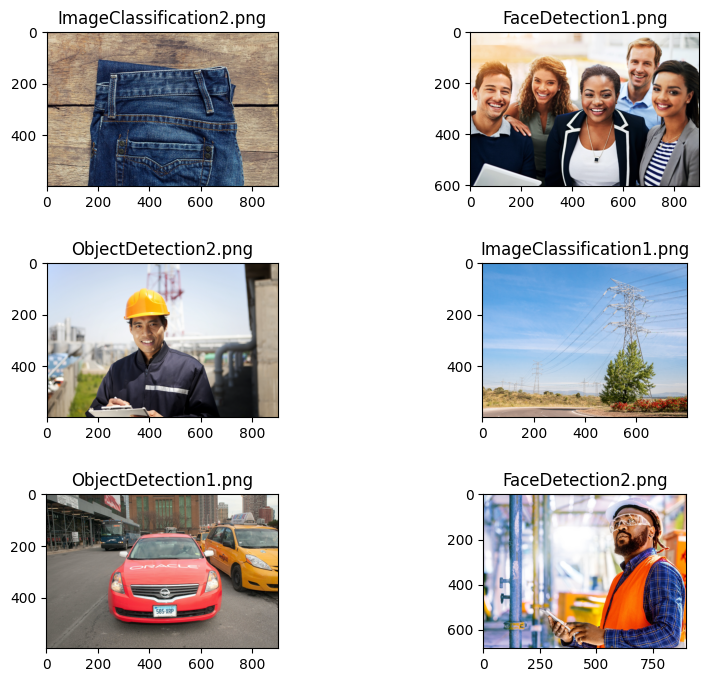

In [17]:
dir_path = './images/'
image_list = glob.glob(os.path.join(dir_path, "*.png"))

plt.figure(figsize=(10, 8)).subplots_adjust(hspace=0.5)
for i, d in enumerate(image_list):
    plt.subplot(3, 2, i+1)
    plt.title(os.path.split(d)[1])
    plt.imshow(mpimg.imread(d),cmap="gray")


### Image Classification (PreTrained Model)

In [11]:
from oci.config import from_file
from oci.ai_vision import AIServiceVisionClient
import oci.ai_vision.models as models

COMPARTMENT_ID = os.getenv("COMPARTMENT_ID")

config = from_file()
vision_client = AIServiceVisionClient(config = config)


In [18]:
with open("./images/ImageClassification1.png", "rb") as file:
    image_file = file.read()

    # INLINE: リクエストのペイロード中に直接画像データを含める
    image_classification_analyze_details = models.AnalyzeImageDetails(
        features = [
            models.ImageClassificationFeature(
                feature_type = "IMAGE_CLASSIFICATION",
                # model_id = "..." if you use custom model, set the model_ocid.
            )
        ],
        image = models.InlineImageDetails(
            source = "INLINE",
            data = base64.b64encode(image_file).decode('utf-8')
        ),
        compartment_id = COMPARTMENT_ID,
    )

    image_classification_response = vision_client.analyze_image(analyze_image_details = image_classification_analyze_details)

print(image_classification_response.data)


{
  "detected_faces": null,
  "errors": [],
  "face_detection_model_version": null,
  "image_classification_model_version": "1.5.97",
  "image_objects": null,
  "image_text": null,
  "labels": [
    {
      "confidence": 0.9933029,
      "name": "Overhead power line"
    },
    {
      "confidence": 0.99322593,
      "name": "Road"
    },
    {
      "confidence": 0.993154,
      "name": "Transmission tower"
    },
    {
      "confidence": 0.9930607,
      "name": "Vegetation"
    },
    {
      "confidence": 0.9929792,
      "name": "Electrical supply"
    }
  ],
  "object_detection_model_version": null,
  "ontology_classes": [
    {
      "name": "Road",
      "parent_names": [],
      "synonym_names": []
    },
    {
      "name": "Overhead power line",
      "parent_names": [],
      "synonym_names": []
    },
    {
      "name": "Vegetation",
      "parent_names": [
        "Plant"
      ],
      "synonym_names": []
    },
    {
      "name": "Transmission tower",
      "parent_n

In [19]:
# Object Storage に事前に格納した画像データを対象に画像解析を行う
NAMESPACE = os.getenv("NAMESPACE")
BUCKET_NAME = os.getenv("BUCKET_NAME")
OBJECT_NAME = "ImageClassification2.png"

image_classification_analyze_details = models.AnalyzeImageDetails(
    features = [
        models.ImageClassificationFeature(
            feature_type = "IMAGE_CLASSIFICATION",
            # model_id = "..." if you use custom model, set the model_ocid.
        )
    ],
    image = models.ObjectStorageImageDetails(
        source = "OBJECT_STORAGE",
        namespace_name = NAMESPACE,
        bucket_name = BUCKET_NAME,
        object_name = OBJECT_NAME
    ),
    compartment_id = COMPARTMENT_ID,
)

image_classification_response = vision_client.analyze_image(analyze_image_details = image_classification_analyze_details)

print(image_classification_response.data)


{
  "detected_faces": null,
  "errors": [],
  "face_detection_model_version": null,
  "image_classification_model_version": "1.5.97",
  "image_objects": null,
  "image_text": null,
  "labels": [
    {
      "confidence": 0.99311525,
      "name": "Denim"
    },
    {
      "confidence": 0.9930825,
      "name": "Pocket"
    },
    {
      "confidence": 0.98596853,
      "name": "Jeans"
    },
    {
      "confidence": 0.6563734,
      "name": "Textile"
    },
    {
      "confidence": 0.62835765,
      "name": "Waist"
    }
  ],
  "object_detection_model_version": null,
  "ontology_classes": [
    {
      "name": "Textile",
      "parent_names": [],
      "synonym_names": []
    },
    {
      "name": "Waist",
      "parent_names": [],
      "synonym_names": []
    },
    {
      "name": "Pocket",
      "parent_names": [],
      "synonym_names": []
    },
    {
      "name": "Jeans",
      "parent_names": [
        "Pants"
      ],
      "synonym_names": []
    },
    {
      "name": "

In [20]:
import time

NAMESPACE = os.getenv("NAMESPACE")
BUCKET_NAME = os.getenv("BUCKET_NAME")

dir_path = './images/'
image_list = glob.glob(os.path.join(dir_path, "*.png"))
object_locations = []

now = time.time()

for d in image_list:
    object_locations.append(
        models.ObjectLocation(
            namespace_name = NAMESPACE,
            bucket_name = BUCKET_NAME,
            object_name = os.path.split(d)[1]
        )
    )

# Object Storage に事前に格納した画像データを対象にバッチ処理で画像解析を行う
create_image_job_details = models.CreateImageJobDetails(
    features = [
        models.ImageClassificationFeature(
            feature_type = "IMAGE_CLASSIFICATION",
            # model_id = "..." if you use custom model, set the model_ocid.
        )
    ],
    input_location = models.ObjectListInlineInputLocation(
        source_type = "OBJECT_LIST_INLINE_INPUT_LOCATION",
        object_locations = object_locations
    ),
    output_location = models.OutputLocation(
        namespace_name = NAMESPACE,
        bucket_name = BUCKET_NAME,
        prefix = f"batch_job_result_{now}"
    ),
    compartment_id = COMPARTMENT_ID,
    display_name = f"ImageClassificationBatchJob-{now}"
)

image_classification_batch_job_response = vision_client.create_image_job(create_image_job_details = create_image_job_details)

print(image_classification_batch_job_response.data)


{
  "compartment_id": "ocid1.compartment.oc1..aaaaaaaanjtbllhqxcg67dq7em3vto2mvsbc6pbgk4pw6cx37afzk3tngmoa",
  "display_name": "ImageClassificationBatchJob-1700118050.5968232",
  "features": [
    {
      "feature_type": "IMAGE_CLASSIFICATION",
      "max_results": null,
      "model_id": null
    }
  ],
  "id": "ocid1.aivisionimagejob.oc1.ap-tokyo-1.amaaaaaa74akfsaauy2mmkwxvmckin75dris3lnlaf7vfiteigmyurdhn75a",
  "input_location": {
    "object_locations": [
      {
        "bucket_name": "ai-bbs-vision",
        "namespace_name": "orasejapan",
        "object_name": "ImageClassification2.png"
      },
      {
        "bucket_name": "ai-bbs-vision",
        "namespace_name": "orasejapan",
        "object_name": "ImageClassification1.png"
      },
      {
        "bucket_name": "ai-bbs-vision",
        "namespace_name": "orasejapan",
        "object_name": "ObjectDetection2.png"
      },
      {
        "bucket_name": "ai-bbs-vision",
        "namespace_name": "orasejapan",
        "ob

In [21]:
from oci.object_storage import ObjectStorageClient

os_client = ObjectStorageClient(config = config)

for d in image_list:
    image_name = os.path.split(d)[1]
    object_name = f"{image_classification_batch_job_response.data.output_location.prefix}/{image_classification_batch_job_response.data.id}/{NAMESPACE}_{BUCKET_NAME}_{image_name}.json"
    get_object_response = os_client.get_object(
        namespace_name = NAMESPACE,
        bucket_name = BUCKET_NAME,
        object_name = object_name
    )
    with open(f'results/image_classification/{image_name}.json', 'wb') as f:
        f.write(get_object_response.data.content)


### Object Detection (PreTrained Model)

In [22]:
with open("./images/ObjectDetection1.png", "rb") as file:
    image_file = file.read()

    # INLINE: リクエストのペイロード中に直接画像データを含める
    object_detection_analyze_details = models.AnalyzeImageDetails(
        features = [
            models.ImageClassificationFeature(
                feature_type = "OBJECT_DETECTION",
                # model_id = "..." if you use custom model, set the model_ocid.
            )
        ],
        image = models.InlineImageDetails(
            source = "INLINE",
            data = base64.b64encode(image_file).decode('utf-8')
        ),
        compartment_id = COMPARTMENT_ID,
    )

    object_detection_analyze_details = vision_client.analyze_image(analyze_image_details = object_detection_analyze_details)

print(object_detection_analyze_details.data)


{
  "detected_faces": null,
  "errors": [],
  "face_detection_model_version": null,
  "image_classification_model_version": null,
  "image_objects": [
    {
      "bounding_polygon": {
        "normalized_vertices": [
          {
            "x": 0.23222222222222222,
            "y": 0.16080402010050251
          },
          {
            "x": 0.4066666666666667,
            "y": 0.16080402010050251
          },
          {
            "x": 0.4066666666666667,
            "y": 0.36515912897822445
          },
          {
            "x": 0.23222222222222222,
            "y": 0.36515912897822445
          }
        ]
      },
      "confidence": 0.9772063,
      "name": "Bus"
    },
    {
      "bounding_polygon": {
        "normalized_vertices": [
          {
            "x": 0.6766666666666666,
            "y": 0.12060301507537688
          },
          {
            "x": 1.0,
            "y": 0.12060301507537688
          },
          {
            "x": 1.0,
            "y": 0.64489

In [23]:
# Object Storage に事前に格納した画像データを対象に画像解析を行う
NAMESPACE = os.getenv("NAMESPACE")
BUCKET_NAME = os.getenv("BUCKET_NAME")
OBJECT_NAME = "ObjectDetection2.png"

object_detection_analyze_details = models.AnalyzeImageDetails(
    features = [
        models.ImageClassificationFeature(
            feature_type = "OBJECT_DETECTION",
            # model_id = "..." if you use custom model, set the model_ocid.
        )
    ],
    image = models.ObjectStorageImageDetails(
        source = "OBJECT_STORAGE",
        namespace_name = NAMESPACE,
        bucket_name = BUCKET_NAME,
        object_name = OBJECT_NAME
    ),
    compartment_id = COMPARTMENT_ID,
)

object_detection_analyze_response = vision_client.analyze_image(analyze_image_details = object_detection_analyze_details)

print(object_detection_analyze_response.data)


{
  "detected_faces": null,
  "errors": [],
  "face_detection_model_version": null,
  "image_classification_model_version": null,
  "image_objects": [
    {
      "bounding_polygon": {
        "normalized_vertices": [
          {
            "x": 0.3322222222222222,
            "y": 0.16166666666666665
          },
          {
            "x": 0.53,
            "y": 0.16166666666666665
          },
          {
            "x": 0.53,
            "y": 0.39166666666666666
          },
          {
            "x": 0.3322222222222222,
            "y": 0.39166666666666666
          }
        ]
      },
      "confidence": 0.9528083,
      "name": "Helmet"
    },
    {
      "bounding_polygon": {
        "normalized_vertices": [
          {
            "x": 0.16777777777777778,
            "y": 0.17666666666666667
          },
          {
            "x": 0.7422222222222222,
            "y": 0.17666666666666667
          },
          {
            "x": 0.7422222222222222,
            "y": 0.9

In [24]:
import time

NAMESPACE = os.getenv("NAMESPACE")
BUCKET_NAME = os.getenv("BUCKET_NAME")

dir_path = './images/'
image_list = glob.glob(os.path.join(dir_path, "*.png"))
object_locations = []

now = time.time()

for d in image_list:
    object_locations.append(
        models.ObjectLocation(
            namespace_name = NAMESPACE,
            bucket_name = BUCKET_NAME,
            object_name = os.path.split(d)[1]
        )
    )

# Object Storage に事前に格納した画像データを対象にバッチ処理で画像解析を行う
create_image_job_details = models.CreateImageJobDetails(
    features = [
        models.ImageClassificationFeature(
            feature_type = "OBJECT_DETECTION",
            # model_id = "..." if you use custom model, set the model_ocid.
        )
    ],
    input_location = models.ObjectListInlineInputLocation(
        source_type = "OBJECT_LIST_INLINE_INPUT_LOCATION",
        object_locations = object_locations
    ),
    output_location = models.OutputLocation(
        namespace_name = NAMESPACE,
        bucket_name = BUCKET_NAME,
        prefix = f"batch_job_result_{now}"
    ),
    compartment_id = COMPARTMENT_ID,
    display_name = f"ObjectDetectionBatchJob-{now}"
)

object_detection_batch_job_response = vision_client.create_image_job(create_image_job_details = create_image_job_details)

print(object_detection_batch_job_response.data)


{
  "compartment_id": "ocid1.compartment.oc1..aaaaaaaanjtbllhqxcg67dq7em3vto2mvsbc6pbgk4pw6cx37afzk3tngmoa",
  "display_name": "ImageClassificationBatchJob-1700118103.695259",
  "features": [
    {
      "feature_type": "OBJECT_DETECTION",
      "max_results": null,
      "model_id": null
    }
  ],
  "id": "ocid1.aivisionimagejob.oc1.ap-tokyo-1.amaaaaaa74akfsaafmzrqu4k7xhmo5wqsewlbwdonqx25rkzsxbarzcmmlqa",
  "input_location": {
    "object_locations": [
      {
        "bucket_name": "ai-bbs-vision",
        "namespace_name": "orasejapan",
        "object_name": "ImageClassification2.png"
      },
      {
        "bucket_name": "ai-bbs-vision",
        "namespace_name": "orasejapan",
        "object_name": "ImageClassification1.png"
      },
      {
        "bucket_name": "ai-bbs-vision",
        "namespace_name": "orasejapan",
        "object_name": "ObjectDetection2.png"
      },
      {
        "bucket_name": "ai-bbs-vision",
        "namespace_name": "orasejapan",
        "object_

In [26]:
from oci.object_storage import ObjectStorageClient

os_client = ObjectStorageClient(config = config)

for d in image_list:
    image_name = os.path.split(d)[1]
    object_name = f"{object_detection_batch_job_response.data.output_location.prefix}/{object_detection_batch_job_response.data.id}/{NAMESPACE}_{BUCKET_NAME}_{image_name}.json"
    get_object_response = os_client.get_object(
        namespace_name = NAMESPACE,
        bucket_name = BUCKET_NAME,
        object_name = object_name
    )
    with open(f'results/object_detection/{image_name}.json', 'wb') as f:
        f.write(get_object_response.data.content)


### Face Detection (PreTrained Model)

In [27]:
with open("./images/FaceDetection1.png", "rb") as file:
    image_file = file.read()

    # INLINE: リクエストのペイロード中に直接画像データを含める
    face_detection_analyze_details = models.AnalyzeImageDetails(
        features = [
            models.ImageClassificationFeature(
                feature_type = "FACE_DETECTION",
                # model_id = "..." if you use custom model, set the model_ocid.
            )
        ],
        image = models.InlineImageDetails(
            source = "INLINE",
            data = base64.b64encode(image_file).decode('utf-8')
        ),
        compartment_id = COMPARTMENT_ID,
    )

    face_detection_response = vision_client.analyze_image(analyze_image_details = face_detection_analyze_details)

print(face_detection_response.data)


{
  "detected_faces": [
    {
      "bounding_polygon": {
        "normalized_vertices": [
          {
            "x": 0.4865800306532118,
            "y": 0.2895919169276214
          },
          {
            "x": 0.6336096869574652,
            "y": 0.2895919169276214
          },
          {
            "x": 0.6336096869574652,
            "y": 0.5867277791677428
          },
          {
            "x": 0.4865800306532118,
            "y": 0.5867277791677428
          }
        ]
      },
      "confidence": 0.98381543,
      "landmarks": null,
      "quality_score": 0.90399426
    },
    {
      "bounding_polygon": {
        "normalized_vertices": [
          {
            "x": 0.7877725558810764,
            "y": 0.2641561208677686
          },
          {
            "x": 0.9397589111328125,
            "y": 0.2641561208677686
          },
          {
            "x": 0.9397589111328125,
            "y": 0.5531720122029958
          },
          {
            "x": 0.787772555

In [28]:
# Object Storage に事前に格納した画像データを対象に画像解析を行う
NAMESPACE = os.getenv("NAMESPACE")
BUCKET_NAME = os.getenv("BUCKET_NAME")
OBJECT_NAME = "FaceDetection1.png"

face_detection_analyze_details = models.AnalyzeImageDetails(
    features = [
        models.ImageClassificationFeature(
            feature_type = "FACE_DETECTION",
            # model_id = "..." if you use custom model, set the model_ocid.
        )
    ],
    image = models.ObjectStorageImageDetails(
        source = "OBJECT_STORAGE",
        namespace_name = NAMESPACE,
        bucket_name = BUCKET_NAME,
        object_name = OBJECT_NAME
    ),
    compartment_id = COMPARTMENT_ID,
)

face_detection_analyze_response = vision_client.analyze_image(analyze_image_details = face_detection_analyze_details)

print(face_detection_analyze_response.data)


{
  "detected_faces": [
    {
      "bounding_polygon": {
        "normalized_vertices": [
          {
            "x": 0.4865800306532118,
            "y": 0.2895919169276214
          },
          {
            "x": 0.6336096869574652,
            "y": 0.2895919169276214
          },
          {
            "x": 0.6336096869574652,
            "y": 0.5867277791677428
          },
          {
            "x": 0.4865800306532118,
            "y": 0.5867277791677428
          }
        ]
      },
      "confidence": 0.98381543,
      "landmarks": null,
      "quality_score": 0.90399426
    },
    {
      "bounding_polygon": {
        "normalized_vertices": [
          {
            "x": 0.7877725558810764,
            "y": 0.26415614608890753
          },
          {
            "x": 0.9397589111328125,
            "y": 0.26415614608890753
          },
          {
            "x": 0.9397589111328125,
            "y": 0.5531720122029958
          },
          {
            "x": 0.7877725

In [29]:
# Object Storage に事前に格納した画像データを対象に画像解析を行う
NAMESPACE = os.getenv("NAMESPACE")
BUCKET_NAME = os.getenv("BUCKET_NAME")
OBJECT_NAME = "FaceDetection1.png"

face_detection_analyze_details = models.AnalyzeImageDetails(
    features = [
        models.ImageClassificationFeature(
            feature_type = "FACE_DETECTION",
            # model_id = "..." if you use custom model, set the model_ocid.
        )
    ],
    image = models.ObjectStorageImageDetails(
        source = "OBJECT_STORAGE",
        namespace_name = NAMESPACE,
        bucket_name = BUCKET_NAME,
        object_name = OBJECT_NAME
    ),
    compartment_id = COMPARTMENT_ID,
)

face_detection_analyze_response = vision_client.analyze_image(analyze_image_details = face_detection_analyze_details)

print(face_detection_analyze_response.data)


{
  "detected_faces": [
    {
      "bounding_polygon": {
        "normalized_vertices": [
          {
            "x": 0.4865800306532118,
            "y": 0.2895919169276214
          },
          {
            "x": 0.6336096869574652,
            "y": 0.2895919169276214
          },
          {
            "x": 0.6336096869574652,
            "y": 0.5867277791677428
          },
          {
            "x": 0.4865800306532118,
            "y": 0.5867277791677428
          }
        ]
      },
      "confidence": 0.98381543,
      "landmarks": null,
      "quality_score": 0.90399426
    },
    {
      "bounding_polygon": {
        "normalized_vertices": [
          {
            "x": 0.7877725558810764,
            "y": 0.26415614608890753
          },
          {
            "x": 0.9397589111328125,
            "y": 0.26415614608890753
          },
          {
            "x": 0.9397589111328125,
            "y": 0.5531720122029958
          },
          {
            "x": 0.7877725

In [30]:
import time

NAMESPACE = os.getenv("NAMESPACE")
BUCKET_NAME = os.getenv("BUCKET_NAME")

dir_path = './images/'
image_list = glob.glob(os.path.join(dir_path, "*.png"))
object_locations = []

now = time.time()

for d in image_list:
    object_locations.append(
        models.ObjectLocation(
            namespace_name = NAMESPACE,
            bucket_name = BUCKET_NAME,
            object_name = os.path.split(d)[1]
        )
    )

# Object Storage に事前に格納した画像データを対象にバッチ処理で画像解析を行う
create_image_job_details = models.CreateImageJobDetails(
    features = [
        models.ImageClassificationFeature(
            feature_type = "FACE_DETECTION",
            # model_id = "..." if you use custom model, set the model_ocid.
        )
    ],
    input_location = models.ObjectListInlineInputLocation(
        source_type = "OBJECT_LIST_INLINE_INPUT_LOCATION",
        object_locations = object_locations
    ),
    output_location = models.OutputLocation(
        namespace_name = NAMESPACE,
        bucket_name = BUCKET_NAME,
        prefix = f"batch_job_result_{now}"
    ),
    compartment_id = COMPARTMENT_ID,
    display_name = f"FaceDetectionBatchJob-{now}"
)

face_detection_batch_job_response = vision_client.create_image_job(create_image_job_details = create_image_job_details)

print(object_detection_batch_job_response.data)


{
  "compartment_id": "ocid1.compartment.oc1..aaaaaaaanjtbllhqxcg67dq7em3vto2mvsbc6pbgk4pw6cx37afzk3tngmoa",
  "display_name": "ImageClassificationBatchJob-1700118103.695259",
  "features": [
    {
      "feature_type": "OBJECT_DETECTION",
      "max_results": null,
      "model_id": null
    }
  ],
  "id": "ocid1.aivisionimagejob.oc1.ap-tokyo-1.amaaaaaa74akfsaafmzrqu4k7xhmo5wqsewlbwdonqx25rkzsxbarzcmmlqa",
  "input_location": {
    "object_locations": [
      {
        "bucket_name": "ai-bbs-vision",
        "namespace_name": "orasejapan",
        "object_name": "ImageClassification2.png"
      },
      {
        "bucket_name": "ai-bbs-vision",
        "namespace_name": "orasejapan",
        "object_name": "ImageClassification1.png"
      },
      {
        "bucket_name": "ai-bbs-vision",
        "namespace_name": "orasejapan",
        "object_name": "ObjectDetection2.png"
      },
      {
        "bucket_name": "ai-bbs-vision",
        "namespace_name": "orasejapan",
        "object_

In [ ]:
from oci.object_storage import ObjectStorageClient

os_client = ObjectStorageClient(config = config)

for d in image_list:
    image_name = os.path.split(d)[1]
    object_name = f"{face_detection_batch_job_response.data.output_location.prefix}/{face_detection_batch_job_response.data.id}/{NAMESPACE}_{BUCKET_NAME}_{image_name}.json"
    get_object_response = os_client.get_object(
        namespace_name = NAMESPACE,
        bucket_name = BUCKET_NAME,
        object_name = object_name
    )
    with open(f'results/face_detection/{image_name}.json', 'wb') as f:
        f.write(get_object_response.data.content)
